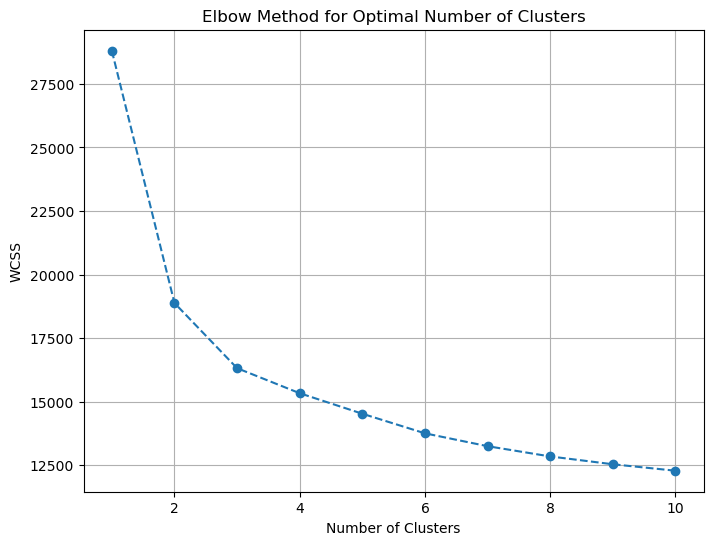

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('marketing_campaign.csv', delimiter='\t')

# Remove missing income values
data_cleaned = data.dropna(subset=['Income'])

# Select relevant numerical features
features = data_cleaned[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5412.847953  1965.933723  54852.590643  0.350877  0.879142   
1        5745.970660  1966.755501  76565.613692  0.056235  0.288509   
2        5597.112983  1971.068385  34968.054509  0.754212  0.459861   
3        5647.056140  1969.021053  73833.077193  0.052632  0.305263   

           Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                        
0        47.933723  436.539961   17.056530       115.961014        22.495127   
1        50.638142  651.559902   38.621027       419.004890        70.995110   
2        49.121903   39.372646    4.849356        21.326065         7.153617   
3        48.235088  512.010526  101.635088       412.926316       124.947368   

         ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster  ...   

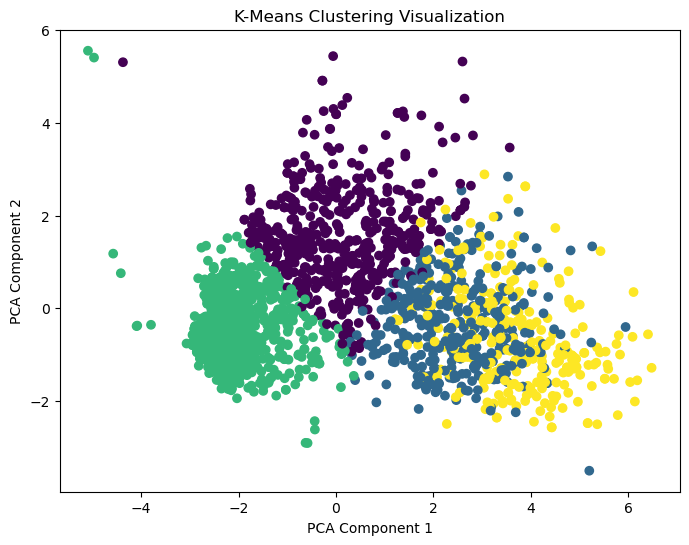

In [3]:
# Choose the optimal number of clusters
optimal_k = 4  # or 3 based on your elbow method results

# Fit the K-Means algorithm to the scaled features
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster assignments to your original cleaned dataset
data_cleaned = data_cleaned.copy()  
data_cleaned['Cluster'] = clusters

# Inspect the clusters
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
print(data_cleaned.groupby('Cluster')[numeric_columns].mean())

# Optional: Visualize clusters (if you have more than 2 features, use PCA or TSNE for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [4]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.26208257024176984


In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(features_scaled)
print(labels)

[-1  0  0 ... -1  0  0]


In [6]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(features_scaled)


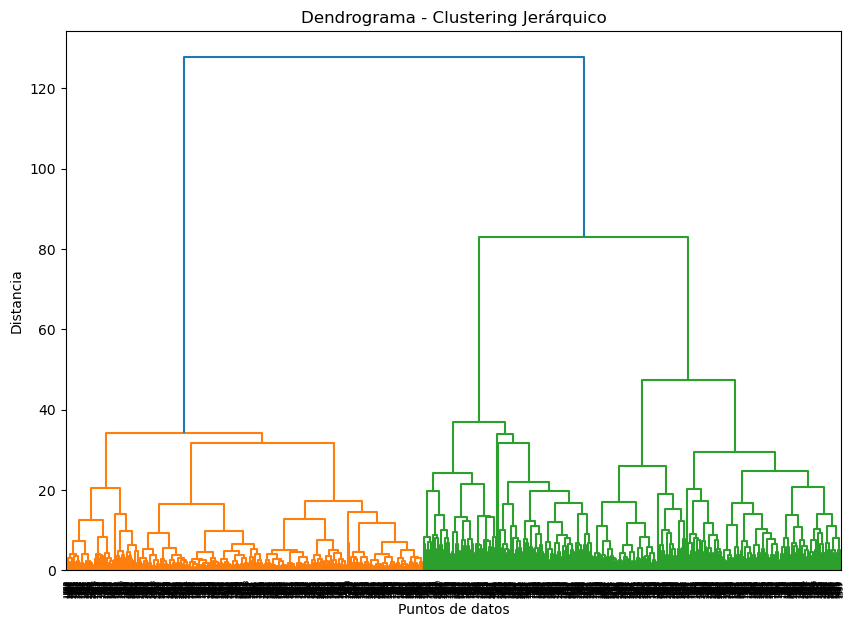

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar la vinculación jerárquica utilizando el método 'ward'
Z = linkage(features_scaled, method='ward')

# Generar el dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
dendrogram(Z)
plt.show()


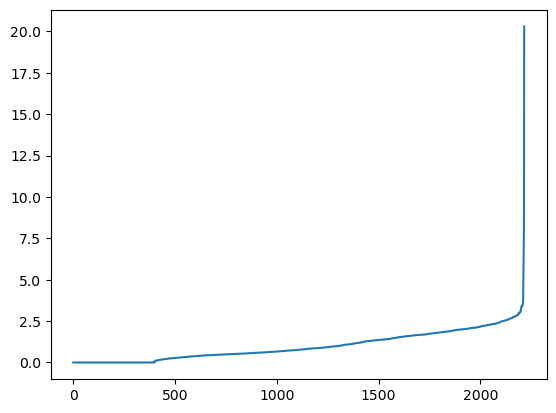

In [8]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(features_scaled)
distances, indices = neigh.kneighbors(features_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()
